In [92]:
%matplotlib inline
import pandas as pd

In [93]:
data= pd.read_csv('train.csv')

In [94]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


survived =Survival	                                           [0 = No, 1 = Yes]

pclass=Ticket class	                                  [1 = 1st, 2 = 2nd, 3 = 3rd]

sex=Sex	

Age=Age in years	

sibsp= no of siblings / spouses aboard the Titanic	

parch= no of parents / children aboard the Titanic	

ticket=Ticket number	

fare=Passenger fare	

cabin=Cabin number	

embarked=port of Embarkation	                         [C = Cherbourg, Q = Queenstown, S = Southampton]

In [95]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

i do not think tat survival chance dependes on name, ticket no, emarkation,SibSp and Parch. and i am dropping cabin because we dont have too many missing values. so removing the unwanted columns

In [96]:
df=data.drop(['Name','Ticket', 'Cabin','Embarked','SibSp','Parch'], axis=1)
df.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
Fare           891
dtype: int64

lets check how many survived

0    549
1    342
Name: Survived, dtype: int64


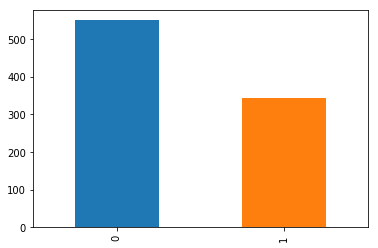

In [97]:
print(df['Survived'].value_counts())
df['Survived'].value_counts().plot(kind='Bar')

In [98]:
df['Survived'].value_counts()*100/len(df)

0    61.616162
1    38.383838
Name: Survived, dtype: float64

male      577
female    314
Name: Sex, dtype: int64
male/female Death in % ,male      64.758698
female    35.241302
Name: Sex, dtype: float64


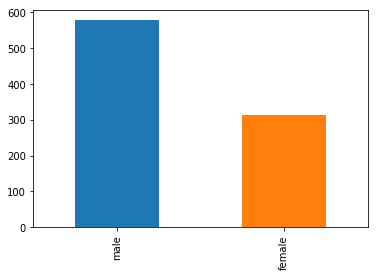

In [99]:
print(df['Sex'].value_counts())
print("male/female Death in % ,"+str(df['Sex'].value_counts()*100/len(df)))
df['Sex'].value_counts().plot(kind='bar')

3    491
1    216
2    184
Name: Pclass, dtype: int64


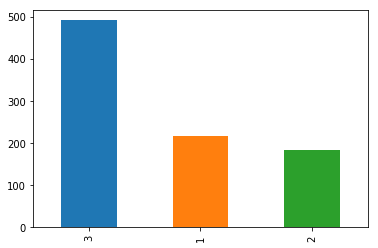

In [100]:
print(df['Pclass'].value_counts())
df['Pclass'].value_counts().plot(kind='bar')

as we can see here most of the people were in 3rd class

In [101]:
print(df['Age'].min(), df['Age'].max())

0.42 80.0


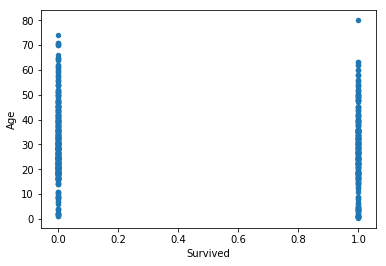

In [102]:
df.plot(kind='scatter',  x='Survived', y='Age')

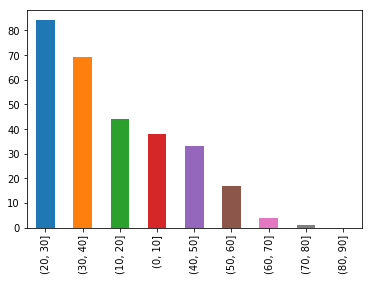

In [103]:
bins=[0,10,20,30,40,50,60,70,80,90]
df['Agebin']=pd.cut(df['Age'],bins)
df[df['Survived']==1]['Agebin'].value_counts().plot(kind='bar')

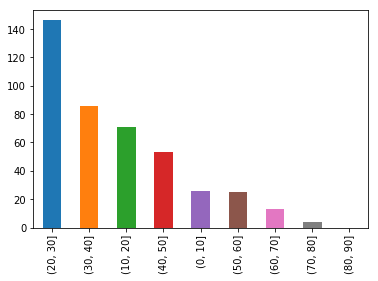

In [104]:
df[df['Survived']==0]['Agebin'].value_counts().plot(kind='bar')

In [105]:
#df['Age'].mean()
df.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
Fare           891
Agebin         714
dtype: int64

In [106]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [107]:
df=df.drop('Agebin', axis=1)

In [108]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            891
Fare           891
dtype: int64

In [109]:
df['Sex']=df['Sex'].map({'female': 1, 'male': 0})

In [110]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,0,22.0,7.2500
1,2,1,1,1,38.0,71.2833
2,3,1,3,1,26.0,7.9250
3,4,1,1,1,35.0,53.1000
4,5,0,3,0,35.0,8.0500


In [111]:
columns=df.iloc[:,2:]
target = 'Survived'
X=columns
Y= data[target]
print(X.shape)
print(Y.shape)
#df1 = df.iloc[:,0:2] 

(891, 4)
(891,)


In [112]:
X.count()


Pclass    891
Sex       891
Age       891
Fare      891
dtype: int64

In [113]:
from sklearn import neighbors,cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test= cross_validation.train_test_split(X,Y, test_size=0.2)

neigh = KNeighborsClassifier(n_neighbors = 1, weights='uniform', algorithm='auto')
neigh.fit(X, Y) 
Y_pred = neigh.predict(X_test)
print(accuracy_score(Y_test,Y_pred))

In [114]:
for k in range(10):
    K_value = k+1
    neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(X, Y) 
    Y_pred = neigh.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred)*100,"% for K-Value:",K_value)

Accuracy is  97.2067039106 % for K-Value: 1
Accuracy is  83.2402234637 % for K-Value: 2
Accuracy is  82.1229050279 % for K-Value: 3
Accuracy is  79.8882681564 % for K-Value: 4
Accuracy is  78.7709497207 % for K-Value: 5
Accuracy is  77.6536312849 % for K-Value: 6
Accuracy is  77.6536312849 % for K-Value: 7
Accuracy is  76.5363128492 % for K-Value: 8
Accuracy is  77.094972067 % for K-Value: 9
Accuracy is  75.4189944134 % for K-Value: 10
